<a href="https://colab.research.google.com/github/injetiharsha/Crop-Disease-Prediction-/blob/main/Crop_Detection_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Dependencies

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Step 1: Restart Runtime
#import os
#os._exit(0)  # This will force restart the runtime


In [66]:
# Step 2: Reinstall the correct versions
!pip install --upgrade sympy torchvision torch

# Step 3: Import everything again (after installation)
import torch
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F

# Step 4: Check if everything works
print("✅ Torch and torchvision loaded successfully!")


  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
✅ Torch and torchvision loaded successfully!


In [67]:
import os

dataset_zip_path = "/Plant_leave_diseases_dataset_without_augmentation.zip"

# Check file type
if os.path.exists(dataset_zip_path):
    print("File exists! Checking type...")
    !file /content/dataset.zip
else:
    print("File does not exist!")


File exists! Checking type...
/content/dataset.zip: empty


In [68]:
import os
import zipfile
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define dataset zip file path
dataset_zip_path = "/Plant_leave_diseases_dataset_without_augmentation.zip"

# Extract dataset if not already extracted
dataset_root = "/content/Plant_leave_diseases_dataset_without_augmentation"  # Check actual folder name

if not os.path.exists(dataset_root):
    print("Extracting dataset...")
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
else:
    print("Dataset already extracted. Skipping extraction.")

# Verify extracted files
print("Extracted files:", os.listdir("/content/"))

# Define the correct dataset path
dataset_path = dataset_root  # Adjust if images are inside a subfolder

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset folder not found at {dataset_path}. Check extracted files.")

# Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor()           # Convert to tensor
])

# Load Dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Verify Dataset Loaded
print("✅ Dataset loaded successfully!")
print(f"Total Images: {len(dataset)}")
print(f"Classes: {dataset.classes}")


Dataset already extracted. Skipping extraction.
Extracted files: ['.config', 'plant_disease_model_14.pth', 'dataset.zip', 'disease_info.csv', 'drive', 'evaluated_model.pth', 'image (3).JPG', 'Plant_leave_diseases_dataset_without_augmentation', 'sample_data']
✅ Dataset loaded successfully!
Total Images: 16223
Classes: ['Background_without_leaves', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


### Import Dataset

In [69]:
indices = list(range(len(dataset)))

In [70]:
import numpy as np

split = int(np.floor(0.85 * len(dataset)))  # train_size

In [71]:
validation = int(np.floor(0.70 * split))  # validation

In [72]:
print(0, validation, split, len(dataset))

0 9652 13789 16223


In [73]:
print(f"length of train size :{validation}")
print(f"length of validation size :{split - validation}")
print(f"length of test size :{len(dataset)-validation}")

length of train size :9652
length of validation size :4137
length of test size :6571


In [74]:
np.random.shuffle(indices)

### Split into Train and Test

In [75]:
train_indices, validation_indices, test_indices = (
    indices[:validation],
    indices[validation:split],
    indices[split:],
)

In [76]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [77]:
targets_size = len(dataset.class_to_idx)

### Model

<b>Convolution Aithmetic Equation : </b>(W - F + 2P) / S + 1 <br>
W = Input Size<br>
F = Filter Size<br>
P = Padding Size<br>
S = Stride <br>

### Transfer Learning

In [78]:
# model = models.vgg16(pretrained=True)

In [79]:
# for params in model.parameters():
#     params.requires_grad = False

In [80]:
# model

In [81]:
# n_features = model.classifier[0].in_features
# n_features

In [82]:
# model.classifier = nn.Sequential(
#     nn.Linear(n_features, 1024),
#     nn.ReLU(),
#     nn.Dropout(0.4),
#     nn.Linear(1024, targets_size),
# )

In [83]:
# model

### Original Modeling

In [84]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, 39),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

In [85]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [86]:
device = "cuda"

In [87]:
model = CNN(targets_size)

In [88]:
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [89]:
!pip install torchsummary


from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
            Conv2d-4         [-1, 32, 224, 224]           9,248
              ReLU-5         [-1, 32, 224, 224]               0
       BatchNorm2d-6         [-1, 32, 224, 224]              64
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
              ReLU-9         [-1, 64, 112, 112]               0
      BatchNorm2d-10         [-1, 64, 112, 112]             128
           Conv2d-11         [-1, 64, 112, 112]          36,928
             ReLU-12         [-1, 64, 112, 112]               0
      BatchNorm2d-13         [-1, 64, 112, 112]             128
        MaxPool2d-14           [-1, 64,

In [90]:
criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
optimizer = torch.optim.Adam(model.parameters())

In [91]:
device = "cuda"

In [92]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler,pin_memory=True
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

# Batch Gradient Descent

In [93]:
from tqdm import tqdm
from sklearn.metrics import f1_score

def calculate_f1(model, data_loader, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # Get predicted class

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return f1_score(all_labels, all_preds, average="weighted")  # 'weighted' handles class imbalance



# Train

🚀 Training model for the first time...


Epoch 1/10: 100%|██████████| 302/302 [01:22<00:00,  3.65it/s]


Epoch 1/10 | Train Loss: 0.1950 | Val Loss: 0.6178 | Train Acc: 95.75% | Val Acc: 89.85% | F1-Score: 0.8994 | Duration: 0:02:01.938952


Epoch 2/10: 100%|██████████| 302/302 [01:24<00:00,  3.57it/s]


Epoch 2/10 | Train Loss: 0.1851 | Val Loss: 0.2945 | Train Acc: 95.36% | Val Acc: 93.86% | F1-Score: 0.9387 | Duration: 0:01:57.886543


Epoch 3/10: 100%|██████████| 302/302 [01:20<00:00,  3.76it/s]


Epoch 3/10 | Train Loss: 0.1483 | Val Loss: 0.6552 | Train Acc: 95.76% | Val Acc: 92.10% | F1-Score: 0.9198 | Duration: 0:01:52.729679


Epoch 4/10: 100%|██████████| 302/302 [01:20<00:00,  3.75it/s]


Epoch 4/10 | Train Loss: 0.1758 | Val Loss: 0.2950 | Train Acc: 95.78% | Val Acc: 94.73% | F1-Score: 0.9474 | Duration: 0:01:54.316036


Epoch 5/10: 100%|██████████| 302/302 [01:20<00:00,  3.77it/s]


Epoch 5/10 | Train Loss: 0.1337 | Val Loss: 0.3171 | Train Acc: 96.43% | Val Acc: 95.29% | F1-Score: 0.9531 | Duration: 0:01:52.779963


Epoch 6/10: 100%|██████████| 302/302 [01:20<00:00,  3.76it/s]


Epoch 6/10 | Train Loss: 0.1004 | Val Loss: 0.5669 | Train Acc: 97.39% | Val Acc: 90.81% | F1-Score: 0.9090 | Duration: 0:01:53.630256


Epoch 7/10: 100%|██████████| 302/302 [01:20<00:00,  3.77it/s]


Epoch 7/10 | Train Loss: 0.1881 | Val Loss: 0.2993 | Train Acc: 95.66% | Val Acc: 94.63% | F1-Score: 0.9464 | Duration: 0:01:53.014820


Epoch 8/10: 100%|██████████| 302/302 [01:20<00:00,  3.77it/s]


Epoch 8/10 | Train Loss: 0.1215 | Val Loss: 0.3610 | Train Acc: 96.65% | Val Acc: 95.14% | F1-Score: 0.9511 | Duration: 0:01:53.104130


Epoch 9/10: 100%|██████████| 302/302 [01:20<00:00,  3.77it/s]


Epoch 9/10 | Train Loss: 0.1306 | Val Loss: 0.3249 | Train Acc: 96.71% | Val Acc: 94.85% | F1-Score: 0.9469 | Duration: 0:01:53.247099


Epoch 10/10: 100%|██████████| 302/302 [01:20<00:00,  3.77it/s]


Epoch 10/10 | Train Loss: 0.1056 | Val Loss: 0.3738 | Train Acc: 97.17% | Val Acc: 93.40% | F1-Score: 0.9342 | Duration: 0:01:53.195113


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

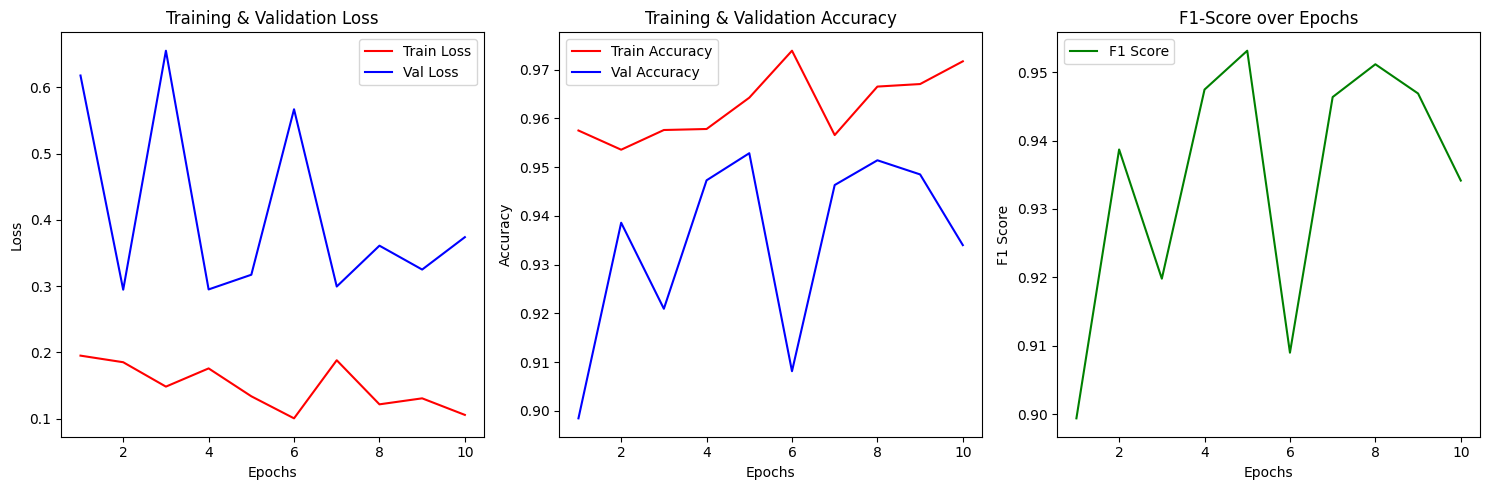

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from sklearn.metrics import accuracy_score, f1_score
import pickle  # ✅ Added for saving/loading results
from google.colab import files  # ✅ Added for auto-download

def calculate_accuracy(model, data_loader, device):
    """Computes accuracy of the model on a dataset."""
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()
            total += targets.size(0)
    return correct / total

def calculate_f1(model, data_loader, device):
    """Computes F1-score for model evaluation."""
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())
    return f1_score(all_labels, all_preds, average='weighted')

def batch_gd(model, criterion, train_loader, validation_loader, optimizer, device, epochs=10):
    """Trains a model using batch gradient descent and returns stored training results."""
    train_losses, validation_losses = [], []
    train_accuracies, validation_accuracies = [], []
    f1_scores = []

    for e in range(epochs):
        t0 = datetime.now()
        train_loss, train_correct, train_total = [], 0, 0

        # Training loop with progress bar
        model.train()
        for inputs, targets in tqdm(train_loader, desc=f"Epoch {e+1}/{epochs}"):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            train_loss.append(loss.item())

            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == targets).sum().item()
            train_total += targets.size(0)

        train_losses.append(np.mean(train_loss))  # Store train loss
        train_accuracies.append(train_correct / train_total)  # Store train accuracy

        # Validation loop
        model.eval()
        validation_loss, val_correct, val_total = [], 0, 0
        with torch.no_grad():
            for inputs, targets in validation_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                validation_loss.append(loss.item())

                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == targets).sum().item()
                val_total += targets.size(0)

        validation_losses.append(np.mean(validation_loss))  # Store val loss
        validation_accuracies.append(val_correct / val_total)  # Store val accuracy
        f1_scores.append(calculate_f1(model, validation_loader, device))  # Store F1-score

        print(f"Epoch {e+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {validation_losses[-1]:.4f} | "
              f"Train Acc: {train_accuracies[-1]*100:.2f}% | Val Acc: {validation_accuracies[-1]*100:.2f}% | "
              f"F1-Score: {f1_scores[-1]:.4f} | Duration: {datetime.now() - t0}")

    return train_losses, validation_losses, train_accuracies, validation_accuracies, f1_scores

def plot_metrics(train_losses, val_losses, train_acc, val_acc, f1_scores):
    """Plots training loss, accuracy, and F1-score and saves it."""
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 5))

    # Loss Plot
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, 'r', label='Train Loss')
    plt.plot(epochs, val_losses, 'b', label='Val Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_acc, 'r', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Val Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()

    # F1-Score Plot
    plt.subplot(1, 3, 3)
    plt.plot(epochs, f1_scores, 'g', label='F1 Score')
    plt.xlabel("Epochs")
    plt.ylabel("F1 Score")
    plt.title("F1-Score over Epochs")
    plt.legend()

    plt.tight_layout()
    plt.savefig("training_plot.png")  # ✅ Auto-save the plot
    plt.show()

    # ✅ Auto-download in Google Colab
    files.download("training_plot.png")

# ✅ Training Only Once and Saving Results
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train only if results are not already saved
try:
    with open("training_results.pkl", "rb") as f:
        train_losses, val_losses, train_acc, val_acc, f1_scores = pickle.load(f)
    print("✅ Loaded previous training results. No retraining needed.")
except FileNotFoundError:
    print("🚀 Training model for the first time...")
    train_results = batch_gd(model, criterion, train_loader, validation_loader, optimizer, device, epochs=10)

    # Save results to avoid retraining
    with open("training_results.pkl", "wb") as f:
        pickle.dump(train_results, f)

    train_losses, val_losses, train_acc, val_acc, f1_scores = train_results

# ✅ Plot Metrics Separately (No Retraining)
plot_metrics(train_losses, val_losses, train_acc, val_acc, f1_scores)


## Print Values

In [118]:
print("Train Losses:", train_losses)
print("Validation Losses:", val_losses)
print("Train Accuracies:", train_acc)
print("Validation Accuracies:", val_acc)
print("F1 Scores:", f1_scores)


Train Losses: [np.float64(0.19502145726952727), np.float64(0.18508074372910066), np.float64(0.1482636686741296), np.float64(0.175760171423872), np.float64(0.13366746545971), np.float64(0.10038987102930437), np.float64(0.18806356992520507), np.float64(0.12153198497140236), np.float64(0.13058685298129236), np.float64(0.10559180944524418)]
Validation Losses: [np.float64(0.6177925030056101), np.float64(0.2945262499744646), np.float64(0.6552244917095568), np.float64(0.2949509223645481), np.float64(0.31711956569432426), np.float64(0.5668535525409075), np.float64(0.2993457308314436), np.float64(0.3609852092800653), np.float64(0.3249457080311213), np.float64(0.3738437910994085)]
Train Accuracies: [0.9575217571487774, 0.9535847492747617, 0.9576253626191463, 0.9578325735598839, 0.9642561127227518, 0.9738914214670534, 0.9565893079154579, 0.9665354330708661, 0.9670534604227103, 0.971715706589308]
Validation Accuracies: [0.8984771573604061, 0.9386028523084361, 0.920957215373459, 0.9473048102489727,

# Save model


In [119]:
torch.save(model.state_dict() , 'CDPmodel.pth')

from google.colab import files

files.download("CDPmodel.pth")  # Download the model to your local machine


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
torch.save(model.state_dict() , 'plant_disease_model_15.pth')

### Load Model

In [116]:
from google.colab import files

files.download("plant_disease_model_15.pth")  # Download the model to your local machine


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
targets_size = 9
model = CNN(targets_size)
model.load_state_dict(torch.load("plant_disease_model_15.pth"))  # Load weights
model.to(device)  # Move to GPU if needed


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)